In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import gammainc, gamma
from functions_for_simulation import *

In [4]:
## initializing

np.random.seed(10)

rowNum, colNum = (100, 200)

Xs = Xs_generator(rowNum, colNum)
# Xs = np.random.normal(0, 4, n)
Ws_1 = np.ones(rowNum) 
Ws_0 = np.zeros(rowNum)

Ys_1 = Ys_generator(Xs, Ws_1, tau=20)
Ys_0 = Ys_generator(Xs, Ws_0, tau=20)

tau = np.average(Ys_1['y']) - np.average(Ys_0['y'])
# # If we use the same eps, tau will be the constant 1.0 

print("The average treatment effect tau: {0:.3f}".format(tau))


The average treatment effect tau: 21.333


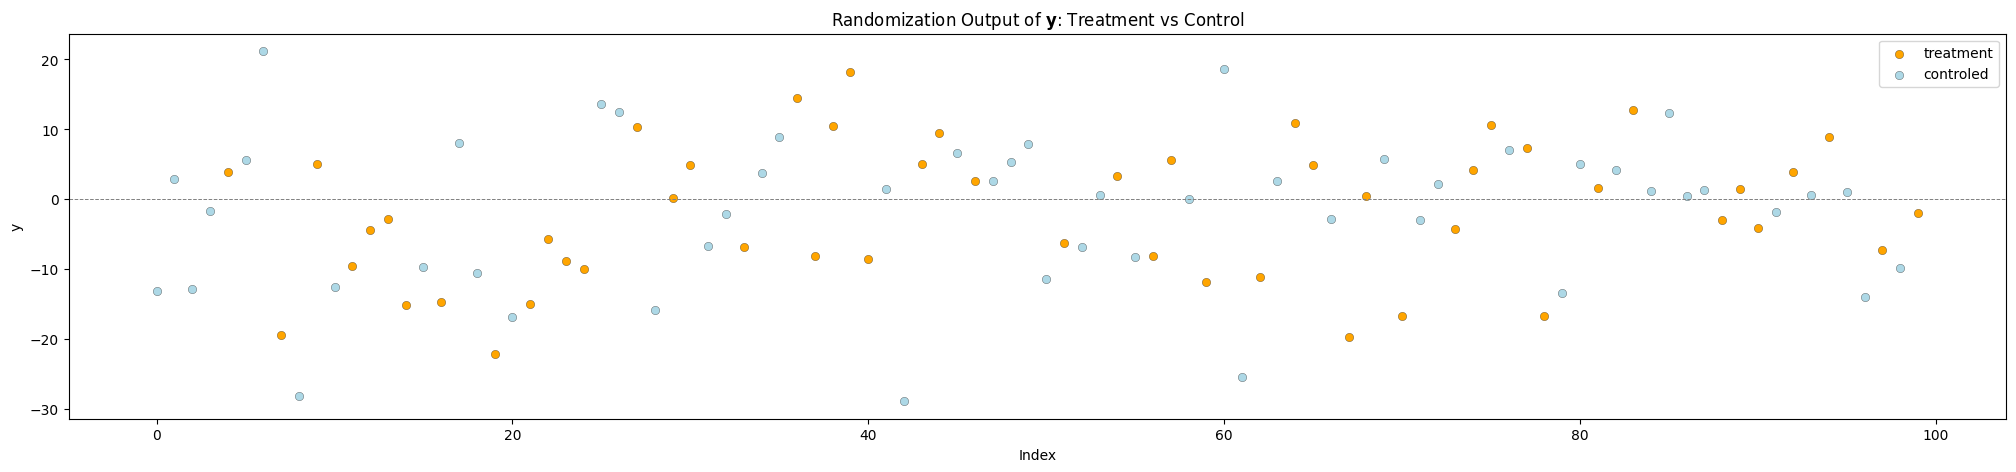

In [5]:
Ws_equal_size = Ws_generator_equal_size(Xs)
df_equal_size = Ys_generator(Xs, Ws_equal_size)
randomization_output_plot(df_equal_size, 0.2)

----- Accepted Rerandomization ----- 
Mahalanobis_distance = 99.000 
 threshold: a = 174.8352729991873
Accepted Ws: [0 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0
 1 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 0 0
 1 0 1 0 0 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 0 1]


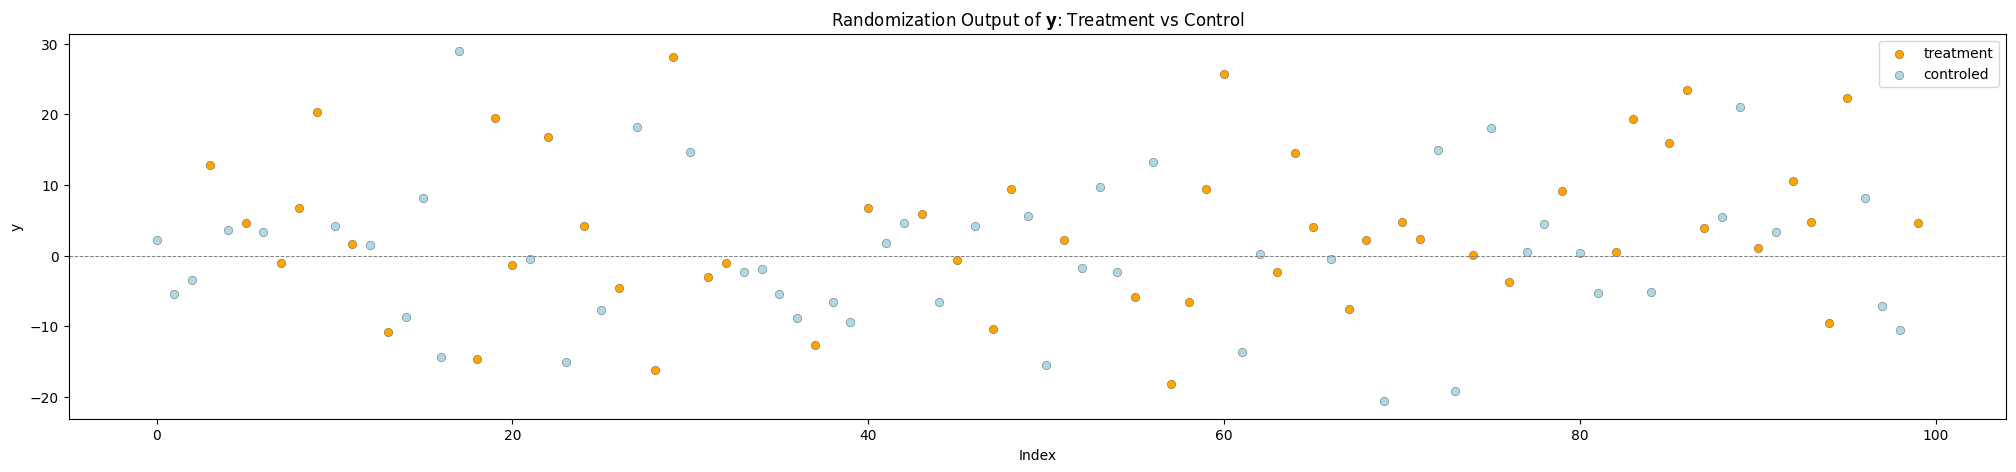

In [6]:
Pa = 0.1
a = choice_of_threshold(colNum, Pa)
Ws_rerandomization = Ws_generator_rerandomization(Xs, a, ifPrint = True)
df_rerandomization = Ys_generator(Xs, Ws_rerandomization)
randomization_output_plot(df_rerandomization)

THEOREM 2.1. Suppose $\sum_{i=1}^n W_i=\sum_{i=1}^n\left(1-W_i\right)$ and $\varphi(\mathbf{x}, \mathbf{W})=\varphi(\mathbf{x}$, $\mathbf{1}-\mathbf{W}) ;$ then $\mathbb{E}(\hat{\tau} \mid \mathbf{x}, \varphi=1)=\tau$.

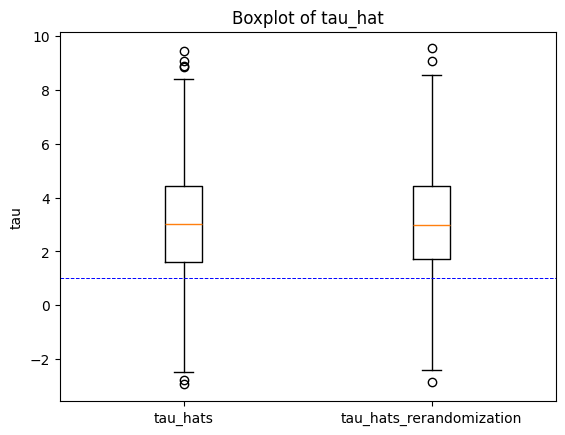

In [7]:
tau_hats = []

iterNum = 1000
for i in range(iterNum):
    Ws = Ws_generator_equal_size(Xs)
    df = Ys_generator(Xs, Ws)
    tau_hats.append(tau_hat_calculator(df))
    # print("The estimated average treatment effect tau_hat {0:.3f} with Ws {1}.".format(tau_hat, Ws))

tau_hats_rerandomization = []
## 需要及时更改threshold a
a = 2050
for i in range(iterNum):
    Ws = Ws_generator_rerandomization(Xs, a, ifPrint=False)
    df = Ys_generator(Xs, Ws)
    tau_hats_rerandomization.append(tau_hat_calculator(df))

# boxplot
plt.boxplot([tau_hats, tau_hats_rerandomization])
plt.xticks([1, 2], ['tau_hats', 'tau_hats_rerandomization'])
# plt.boxplot(tau_hats_rerandomization)
plt.title('Boxplot of tau_hat')

# plt.axhline(y=3, color='blue', linestyle='--')
plt.axhline(y=1, color='blue', linestyle='--', linewidth = 0.7)

# add axis label
plt.ylabel('tau')

plt.show()

THEOREM 3.1. Assume rerandomization is conducted using $\varphi_M$ with $p_w=1 / 2$, and the covariate means are multivariate normal; then
$$
\operatorname{cov}\left(\overline{\mathbf{X}}_T-\overline{\mathbf{X}}_C \mid \mathbf{x}, \varphi_M=1\right)=v_a \operatorname{cov}\left(\overline{\mathbf{X}}_T-\overline{\mathbf{X}}_C \mid \mathbf{x}\right),
$$
where
$$
v_a \equiv \frac{2}{k} \times \frac{\gamma(k / 2+1, a / 2)}{\gamma(k / 2, a / 2)}=\frac{P\left(\chi_{k+2}^2 \leq a\right)}{P\left(\chi_k^2 \leq a\right)}
$$
and $\gamma$ denotes the incomplete gamma function: $\gamma(b, c) \equiv \int_0^c y^{b-1} e^{-y} d y$.
We will verify the result using simulation.

In [8]:
iterNum = 500
diff_T_C1s = []
for i in range(iterNum):
    Ws = Ws_generator_rerandomization(Xs, a, ifPrint=False)
    diff_T_C1s.append(diff_T_C_calculator(Xs, Ws))
cov_diff1 = np.cov(diff_T_C1s)
# print("-----cov of diff after rerandomization-----")


diff_T_C2s = []
for i in range(iterNum):
    Ws = Ws_generator_equal_size(Xs)
    diff_T_C2s.append(diff_T_C_calculator(Xs, Ws))
cov_diff2 = np.cov(diff_T_C2s)
# print("cov of diff : {0}".format([[round(num, 4) for num in row] for row in cov_diff2]))

k = colNum
va = 2/k * (gammainc(k/2+1, a/2) * gamma(k/2+1)) / (gammainc(k/2, a/2) * gamma(k/2))
print("Difference between cov of diff after rerandomization and cov of diff * va")
print(cov_diff1 - va*cov_diff2)
print(np.linalg.norm(cov_diff1 - va*cov_diff2, ord=2))

Difference between cov of diff after rerandomization and cov of diff * va
[[ 0.0063824   0.00854179  0.00408595 ...  0.00411041  0.00723182
  -0.00682399]
 [ 0.00854179  0.00721714  0.00609618 ...  0.00311912  0.00141401
  -0.00579431]
 [ 0.00408595  0.00609618 -0.00078368 ...  0.00359668 -0.0108095
   0.00332732]
 ...
 [ 0.00411041  0.00311912  0.00359668 ...  0.00440681  0.00678436
   0.00070045]
 [ 0.00723182  0.00141401 -0.0108095  ...  0.00678436 -0.0039716
   0.00128783]
 [-0.00682399 -0.00579431  0.00332732 ...  0.00070045  0.00128783
  -0.00655111]]
0.6582818999419909


THEOREM 3.2. If (a) rerandomization is conducted using $\varphi_M$ with $p_w=$ $1 / 2$, (b) the covariate and outcome means are normally distributed, and (c) the treatment effect is additive, then the percent reduction in variance of $\hat{\tau}$ is
$$
 100(1-v_a) R^2 ,
$$
where $R^2$ represents the squared multiple correlation between $\mathbf{y}$ and $\mathbf{x}$ within a treatment group.

In [9]:
import statsmodels.api as sm
y = df['y']
# X = df.drop(['y'], axis=1)
Xs = sm.add_constant(Xs)
model = sm.OLS(y, Xs).fit()
R_square = model.rsquared

In [10]:
iterNum = 5000
tau_hats = []; tau_hats_rerandomization = []

for i in range(iterNum):
    Ws = Ws_generator_equal_size(Xs)
    df = Ys_generator(Xs, Ws)
    # print("R_square: {0:.3f}".format(R_square))
    tau_hats.append(tau_hat_calculator(df))

for i in range(iterNum):
    Ws = Ws_generator_rerandomization(Xs, a, ifPrint=False)
    df = Ys_generator(Xs, Ws)
    tau_hats_rerandomization.append(tau_hat_calculator(df))

# print(va)
# print(np.cov(tau_hats))
# print(np.cov(tau_hats_rerandomization))

print(100 * (np.cov(tau_hats) - np.cov(tau_hats_rerandomization)) / np.cov(tau_hats))

# R_square = np.corrcoef(Xs, Ys_1)[0,1] ** 2

print(100 * (1 - va) * R_square)

3.6288266341975235
2.3314683517128287e-12


In [11]:

iterNum = 5000
Ms_normal = []
Ms_regular = []
Ms_l2 = []

for i in range(iterNum):
    Ws = Ws_generator_equal_size(Xs)
    Ms_normal.append(Mahalanobis_distance(Xs, Ws))
    Ms_regular.append(Mahalanobis_distance_regularization(Xs, Ws, lambda_value=1))
    Ms_l2.append(l2_distance(Xs, Ws))


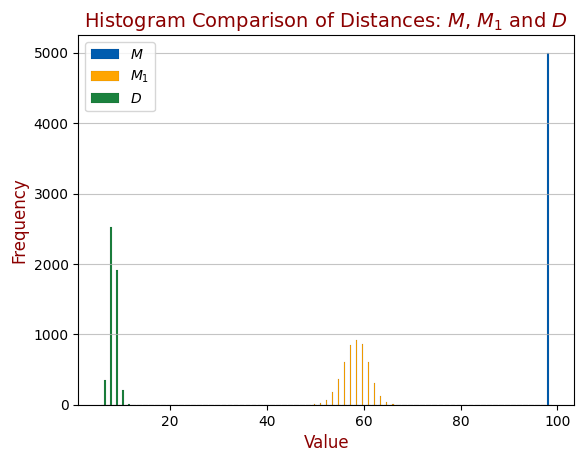

In [12]:

data1 = Ms_normal
data2 = Ms_regular
data3 = Ms_l2

plt.hist([data1, data2, data3], bins=75, color=['#005CAF', '#ffa500', '#1B813E'], alpha=1, label=['$M$', '$M_1$', '$D$'],
         edgecolor='black', linewidth=0.05)

# 添加网格线到图表上，仅对y轴添加网格线，并设置透明度为0.75
plt.grid(axis='y', alpha=0.75)

# 设置x轴的标签，标签内容为'Value'，字体大小为12，颜色为暗红色
plt.xlabel('Value', fontsize=12, color='darkred')
# 设置y轴的标签，标签内容为'Frequency'，字体大小为12，颜色为暗红色
plt.ylabel('Frequency', fontsize=12, color='darkred')

# 设置图表的标题，标题内容为'Histogram Comparison of Two Data Groups'，字体大小为14，颜色为暗红色
plt.title('Histogram Comparison of Distances: $M$, $M_1$ and $D$', fontsize=14, color='darkred')

# 计算两组数据的均值和中位数
mean1, var1 = np.mean(data1), np.var(data1)
mean2, var2 = np.mean(data2), np.var(data2)
mean3, var3 = np.mean(data3), np.var(data3)

plt.legend(loc='upper left')

# 显示图表
plt.show()

# 将图表保存为名为'histogram_comparison.png'的图片文件，并设置分辨率为300dpi

In [13]:
import math

iterNum = 5000
Ms_normal = []
Ms_regular = []

lambda_values = np.round(np.arange(0, 3.2, 0.2), 1).tolist()

for i in range(iterNum):
    Ws = Ws_generator_equal_size(Xs)
    Ms_regular_for_lambda = []
    for lambda_value in lambda_values:
        Ms_regular_for_lambda.append(Mahalanobis_distance_regularization(Xs, Ws, lambda_value))
    Ms_regular.append(Ms_regular_for_lambda)



KeyboardInterrupt: 

In [62]:
data = pd.DataFrame(Ms_regular, columns=lambda_values)


<>:20: SyntaxWarning: invalid escape sequence '\l'
<>:20: SyntaxWarning: invalid escape sequence '\l'
C:\Users\19514\AppData\Local\Temp\ipykernel_22264\734594454.py:20: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel("$\lambda$", fontsize=16, color='darkred')
C:\Users\19514\AppData\Local\Temp\ipykernel_22264\734594454.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=14, fontweight='bold')


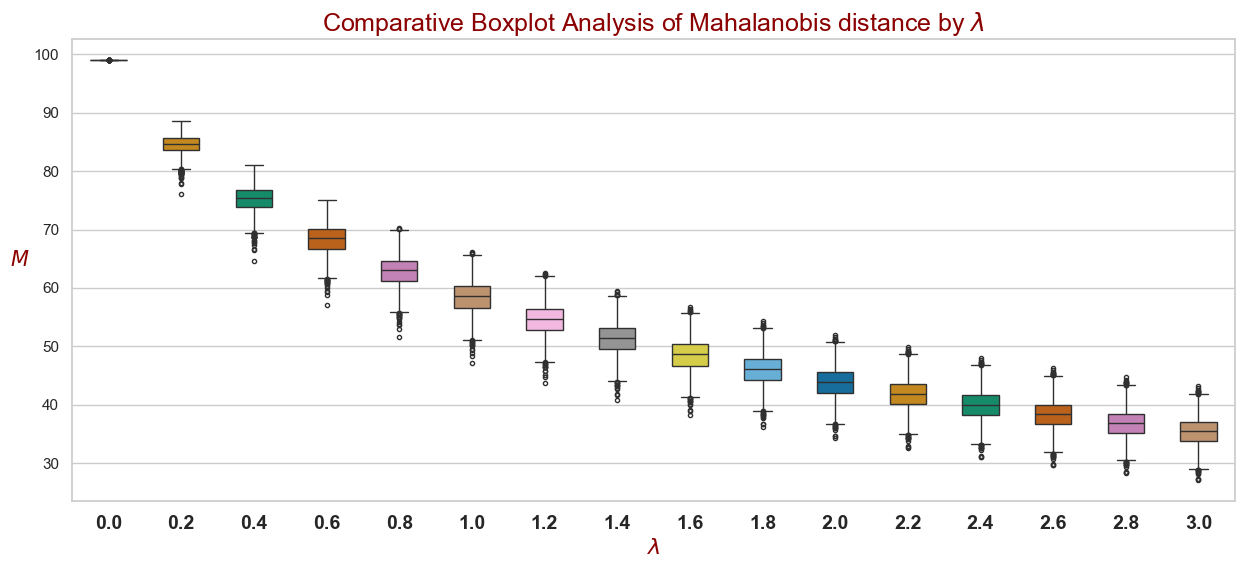

In [63]:
import seaborn as sns

# 使用seaborn绘制箱线图
sns.set_theme(style='whitegrid') # 设置背景风格
plt.figure(figsize=(15, 6)) # 设置图形大小

# 绘制箱线图
ax = sns.boxplot(data=data, width=0.5, palette="colorblind", fliersize=3)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14, fontweight='bold')


# texts = ['Balanced Random Assignment', 'Rerandomization', 'A/A test', 'Block randomization', 'Stratified Randomization']
# for tick, text in zip(range(len(texts)), texts):
#     plt.text(tick, 0, text, 
#              horizontalalignment='center', size=15, color='black', weight='semibold')

# 设置图表标题和坐标轴标签
plt.title(r"Comparative Boxplot Analysis of Mahalanobis distance by $\lambda$", fontsize=18, color='darkred')
plt.ylabel(r"$M$", rotation=0,labelpad=10,fontsize=15, color='darkred')
plt.xlabel("$\lambda$", fontsize=16, color='darkred')

# plt.text(-0.5, tau, r'$\tau=${0}'.format(tau), fontsize=10, verticalalignment='center', horizontalalignment='right')
# plt.axhline(y=tau, color='red', linestyle='--', linewidth = 1)

# 显示图形
plt.show()

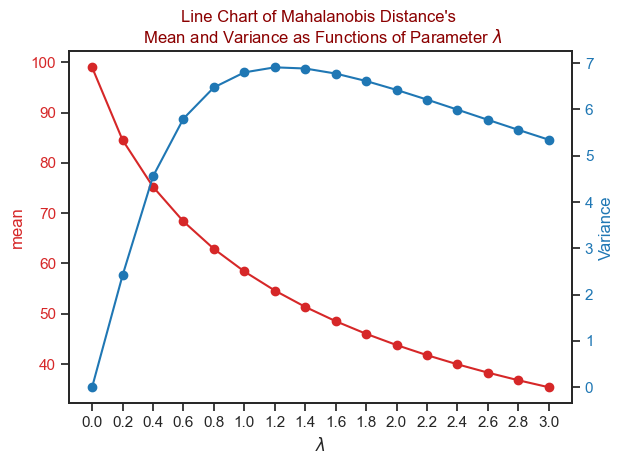

In [64]:
from matplotlib.pyplot import MultipleLocator

# 创建数据
data_plot = pd.DataFrame({
    'lambda': data.columns,
    'mean': data.mean(),
    'variance': data.var()
})

sns.set_theme(style='ticks')
fig, ax1 = plt.subplots()

plt.title(r"Line Chart of Mahalanobis Distance's "+"\n Mean and Variance as Functions of Parameter "+r"$\lambda$", color='darkred')

color = 'tab:red'
ax1.set_xlabel(r'$\lambda$')
ax1.set_ylabel("mean", color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.plot(data_plot['lambda'], data_plot['mean'], color=color, marker = 'o')

ax1.xaxis.set_major_locator(MultipleLocator(0.2))
ax2 = ax1.twinx()  # 创建共用x轴的第二个y轴

color = 'tab:blue'
ax2.set_ylabel('Variance', color=color)
ax2.plot(data_plot['lambda'], data_plot['variance'], color=color, marker = 'o')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

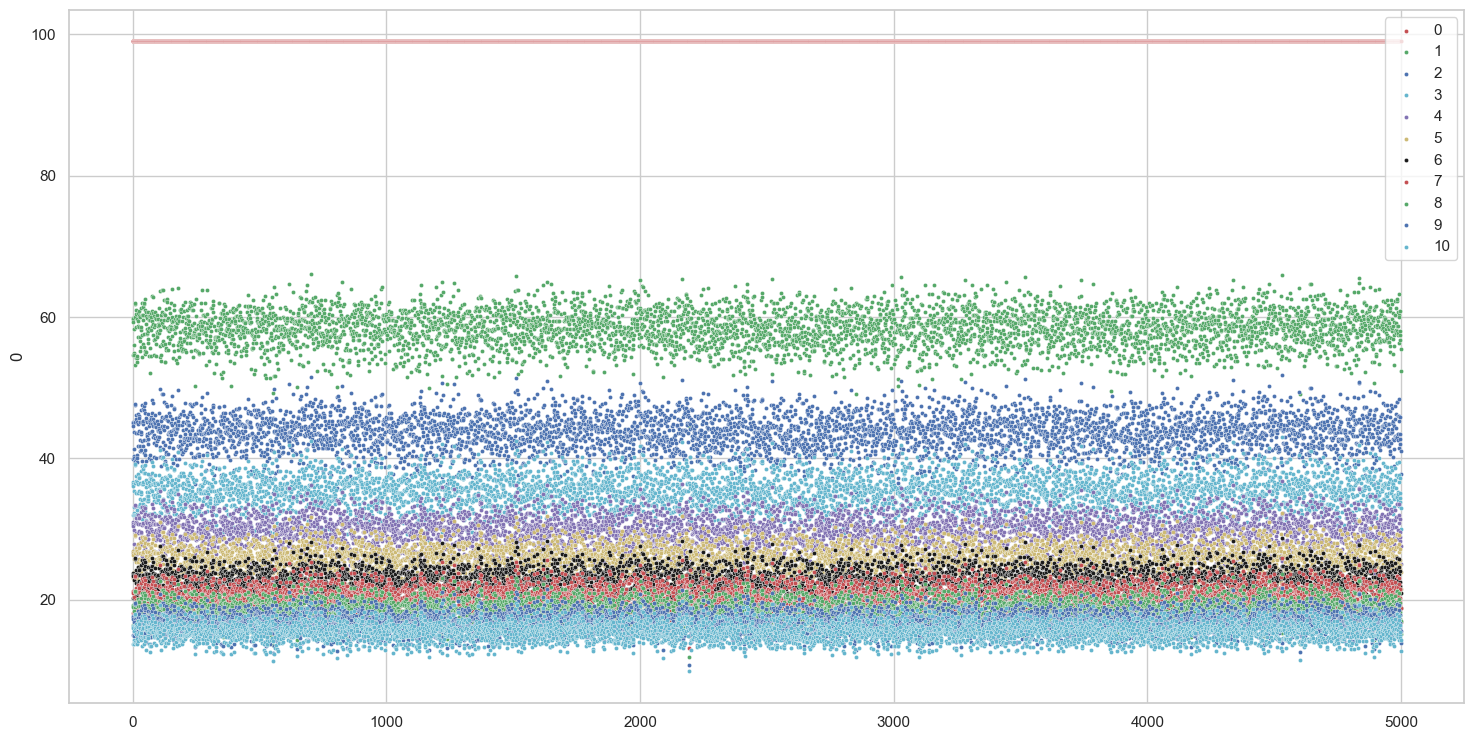

In [59]:
sns.set_theme(style='whitegrid') # 设置背景风格
plt.figure(figsize=(18, 9)) 
# 提取DataFrame中所有的列名
columns = data.columns.tolist()

# 为每一组数据生成一个颜色，可以自行替换你想要的颜色列表
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

for i, column in enumerate(columns):
    sns.scatterplot(data[column], color=colors[i % len(colors)], label=column, marker='o', s =9)

# 添加图例
plt.legend()

# 显示图形
plt.show()